In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('dataset_twitter.csv',encoding="utf-8")

In [3]:
data.shape

(11434, 3)

In [4]:
data.isnull().sum()

Id        0
Text      0
Target    0
dtype: int64

In [5]:
data['Target'].value_counts()

0    6199
1    5235
Name: Target, dtype: int64

In [6]:
data.head()

,Id,Text,Target
0,2.900000e+17,Argh.. I hate my life,1
1,2.900000e+17,I'm good,0
2,2.900000e+17,Enjoy my life,0
3,2.900000e+17,RT : I do what I want,0
4,2.900000e+17,My life is just a series of unfortunate fucked...,1


# PREPROCESSING

In [7]:
words = [i.split() for i in data['Text']]
words[0]

['Argh..', 'I', 'hate', 'my', 'life']

In [8]:
words = [[j.lower() for j in i] for i in words]
words[0]

['argh..', 'i', 'hate', 'my', 'life']

In [9]:
words=[[ j for j in i if 'http' not in j or 'https:' not in j or '@' not in j or 'www' not in j] for i in words]

In [10]:
import re
words=[[' '.join(re.findall('[a-zA-Z]+',j)) for j in i] for i in words]
words[0]

['argh', 'i', 'hate', 'my', 'life']

In [11]:
words=[ [i for i in words[j] if len(i)>1]for j in range(len(words))]
words[0]

['argh', 'hate', 'my', 'life']

In [12]:
words=[[j.replace(" ","") for j in i] for i in words]
words[0]

['argh', 'hate', 'my', 'life']

In [13]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = list(stopwords.words('english'))
stop_words.remove('no')
stop_words.remove('nor')
stop_words.remove('not')
stop_words=[[re.sub('[^a-z]+','',j) for j in i] for i in stop_words]
stop_words=[''.join(i)for i in stop_words]
stop_words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Murali\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'youre',
 'youve',
 'youll',
 'youd',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'shes',
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'thatll',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'fe

In [14]:
words = [[j for j in i if j not in stop_words] for i in words]
words[0]

['argh', 'hate', 'life']

In [15]:
from nltk.stem import WordNetLemmatizer
for k,i in enumerate(words):
    i=[WordNetLemmatizer().lemmatize(j,"v") for j in i]
    words[k]=[WordNetLemmatizer().lemmatize(j,"a") for j in i]
words[0]

['argh', 'hate', 'life']

In [16]:
from nltk.stem import PorterStemmer
for k,i in enumerate(words):
    words[k]=[PorterStemmer().stem(w) for w in i]
words[0]

['argh', 'hate', 'life']

In [17]:
words = [' '.join(i) for i in words]
words[0]

'argh hate life'

In [18]:
df = pd.DataFrame(words)
df.columns = ['Text']
df.head()

,Text
0,argh hate life
1,im good
2,enjoy life
3,rt want
4,life seri unfortun fuck event margaretkuta mwr...


In [19]:
df['Target'] = data['Target']
df.head()
df.tail()

,Text,Target
11429,ajhgdfakjhajha im disappoint orz,1
11430,rt suck life,1
11431,life shit guess mean,1
11432,hate,1
11433,feel depress,1


# DATA VISUALIZATION

In [20]:
import seaborn as sns

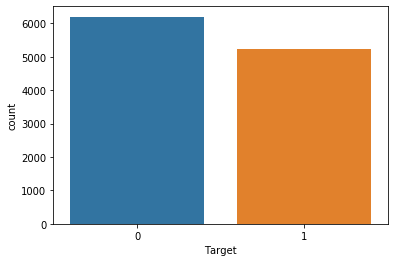

In [21]:
sns.countplot(df['Target']) 

# FEATURE EXTRACTION

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df['Text'],df['Target'],test_size=0.2,shuffle=True)

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer='word', stop_words='english',min_df=4,
                                   ngram_range=(1, 1), max_features=3000)
vectorizer.fit(x_train)
xtrain_unigrams =  list(vectorizer.transform(x_train).toarray())
xtest_unigrams = list(vectorizer.transform(x_test).toarray())

In [24]:
len(vectorizer.get_feature_names())
vectorizer.get_feature_names()

C:\Users\Murali\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['abl',
 'absolut',
 'accept',
 'ach',
 'achiev',
 'actual',
 'adamtodd',
 'adventur',
 'ah',
 'aint',
 'alcohol',
 'aliv',
 'allah',
 'allow',
 'alon',
 'alot',
 'alreadi',
 'alright',
 'alway',
 'amaaaaz',
 'amaz',
 'amen',
 'amp',
 'angri',
 'annoy',
 'anoth',
 'anxieti',
 'anymor',
 'anyon',
 'anyth',
 'apart',
 'appar',
 'appreci',
 'asap',
 'ask',
 'ass',
 'atm',
 'attitud',
 'aw',
 'awak',
 'away',
 'awesom',
 'awh',
 'awkward',
 'babe',
 'babi',
 'bad',
 'basic',
 'bc',
 'beauti',
 'becom',
 'bed',
 'begin',
 'believ',
 'best',
 'bestfriend',
 'bieberlight',
 'big',
 'bitch',
 'bite',
 'black',
 'blame',
 'blast',
 'bless',
 'bodi',
 'bore',
 'boredom',
 'bout',
 'boy',
 'boyfriend',
 'break',
 'breath',
 'brilliant',
 'bring',
 'bro',
 'brother',
 'bullshit',
 'bunni',
 'busi',
 'button',
 'buy',
 'bye',
 'camper',
 'campu',
 'car',
 'care',
 'caus',
 'chang',
 'check',
 'child',
 'choos',
 'clearli',
 'colleg',
 'come',
 'comfi',
 'comfort',
 'complain',
 'complet',
 'complic

# CLASSIFICATION

In [25]:
from sklearn import svm
from sklearn import ensemble
from sklearn import neural_network
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB

### SVM

In [26]:
svm1=svm.SVC(kernel='rbf',gamma='scale',shrinking=True, degree=3,random_state=None)
svm1.fit(xtrain_unigrams,y_train)


SVC()

In [27]:
ypredict_unigrams_svm = svm1.predict(xtest_unigrams)

In [28]:
accuracy_score(y_test,ypredict_unigrams_svm)

0.944905990380411

In [29]:
print(classification_report(y_test,ypredict_unigrams_svm))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1263
           1       0.95      0.93      0.94      1024

    accuracy                           0.94      2287
   macro avg       0.95      0.94      0.94      2287
weighted avg       0.94      0.94      0.94      2287



### RANDOM FOREST

In [30]:
rf=ensemble.RandomForestClassifier(n_estimators=100)
rf.fit(xtrain_unigrams,y_train)

RandomForestClassifier()

In [31]:
ypredict_unigrams_rf = rf.predict(xtest_unigrams)

In [32]:
accuracy_score(y_test,ypredict_unigrams_rf)

0.9453432444250109

In [33]:
print(classification_report(y_test,ypredict_unigrams_rf))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1263
           1       0.95      0.93      0.94      1024

    accuracy                           0.95      2287
   macro avg       0.95      0.94      0.94      2287
weighted avg       0.95      0.95      0.95      2287



### MLP

In [34]:
mlp=neural_network.MLPClassifier(max_iter=800,activation='tanh',alpha=0.05,learning_rate='adaptive',
                                 hidden_layer_sizes=(50,),solver='adam')
mlp.fit(xtrain_unigrams,y_train)

MLPClassifier(activation='tanh', alpha=0.05, hidden_layer_sizes=(50,),
              learning_rate='adaptive', max_iter=800)

In [35]:
ypredict_unigrams_mlp = mlp.predict(xtest_unigrams)

In [36]:
accuracy_score(y_test,ypredict_unigrams_mlp)

0.9274158285964145

In [37]:
print(classification_report(y_test,ypredict_unigrams_mlp))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1263
           1       0.92      0.92      0.92      1024

    accuracy                           0.93      2287
   macro avg       0.93      0.93      0.93      2287
weighted avg       0.93      0.93      0.93      2287



### NAIVE BAYES

In [38]:
mnb = MultinomialNB()
mnb.fit(xtrain_unigrams,y_train)

MultinomialNB()

In [39]:
ypredict_unigrams_mnb = mnb.predict(xtest_unigrams)

In [40]:
accuracy_score(y_test,ypredict_unigrams_mnb)

0.910362920857018

In [41]:
print(classification_report(y_test,ypredict_unigrams_mnb))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1263
           1       0.91      0.88      0.90      1024

    accuracy                           0.91      2287
   macro avg       0.91      0.91      0.91      2287
weighted avg       0.91      0.91      0.91      2287



# COMPARISION OF ML MODELS

In [42]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 1.0, 'Accuracy comparision')

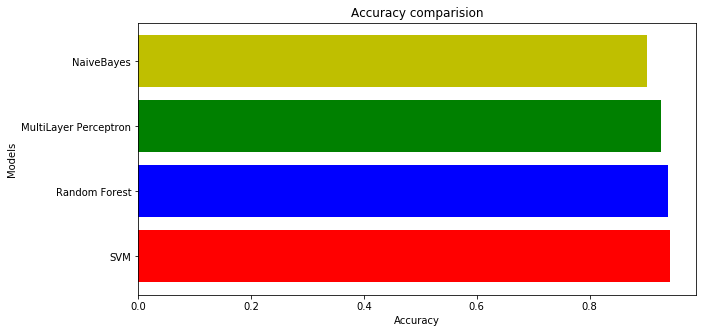

In [43]:
d = {'SVM':0.9418452120682116, 'Random Forest':0.9392216878006121, 'MultiLayer Perceptron':0.9256668124180149, 'NaiveBayes':0.9016178399650197}
models = list(d.keys())
accuracy = list(d.values())
fig= plt.figure(figsize = (10, 5))

plt.barh(models, accuracy, color ='rbgy')
plt.ylabel('Models')
plt.xlabel('Accuracy')
plt.title('Accuracy comparision')

In [44]:
import pickle
filename = 'vectorizer.pkl'
pickle.dump(vectorizer, open(filename, 'wb'))

In [45]:
filename = 'prediction.pkl'
pickle.dump(svm1, open(filename, 'wb'))